## 시계열 데이터 전처리
결측치 처리의 주요 목표
- 데이터 왜곡 방지
- 예측 정확도 향상
- 유의미한 데이터 분석

데이터셋에서 결측치의 위치 확인 방법
- 데이터셋 요약 정보 확인
- 시각화
- 조건식을 활용한 필터링
- 결측치 개수 확인

In [1]:
# 데이터셋에서 결측치의 위치 확인 방법 실습
import pandas as pd
import numpy as np

# 예시 데이터셋 생성
data = pd.DataFrame({'A' : [1, 2, np.nan, 4, 5],
                    'B' : [6, np.nan, 8, 9, 10],
                    'C' : [11, 12, 13, np.nan, 15]})

# 결측치 위치 확인
print(data.isnull())

       A      B      C
0  False  False  False
1  False   True  False
2   True  False  False
3  False  False   True
4  False  False  False


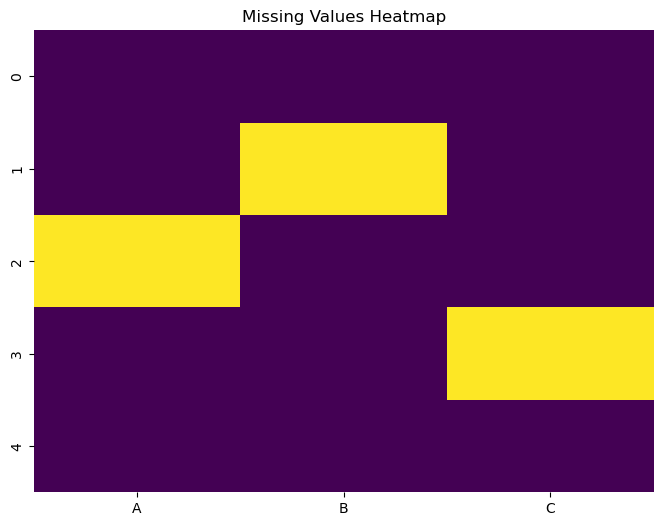

In [4]:
# 데이터셋에서 결측치의 위치 확인 방법 실습 - 히트맵 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8, 6))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [5]:
# 개수 확인 방법

# 결측치 개수 확인
missing_count = data.isnull().sum()
print(missing_count)

A    1
B    1
C    1
dtype: int64


결측치의 빈도 및 패턴을 분석하는 것은 결측치 처리 전략을 수립하는 데 도움이 된다.<br>
결측치를 삭제(결측치가 있는 행 또는 열 삭제)하는 방법은 신중하게 사용해야 한다. 행을 삭제하여 해당 시간 인덱스의 데이터를 제거(해당 시간에 대한 데이터를 분석에서 제외하고자 할 때)하거나, 열을 삭제하여 해당 변수(열)의 데이터를 제거(해당 변수가 분석에 중요하지 않거나 결측치의 비율이 매우 높을 때)한다.

In [9]:
# 결측치의 삭제
# 결측치가 있는 행 삭제

np.random.seed(42)
dates = pd.date_range(start = '2023-01-01', periods=100, freq='D')
values = np.random.randn(100)
values[10] = np.nan # 결측치 생성

data = pd.DataFrame({'Date' : dates, 'Value' : values})
print(data)

# 결측치 생성 여부 체크
row_11 = data.iloc[10]
print(row_11)
# Row_11 값을 확인하니 NaN 결측값 생성

# 결측치 개수 확인 체크
print("결측치 개수 : ")
print(data.isnull().sum())

# 결측치가 있는 행 삭제
data_without_missing = data.dropna(axis=0)

# 결측치 삭제 후 결과 확인
print("결측치가 제거된 데이터 : ")
print(data_without_missing)

         Date     Value
0  2023-01-01  0.496714
1  2023-01-02 -0.138264
2  2023-01-03  0.647689
3  2023-01-04  1.523030
4  2023-01-05 -0.234153
..        ...       ...
95 2023-04-06 -1.463515
96 2023-04-07  0.296120
97 2023-04-08  0.261055
98 2023-04-09  0.005113
99 2023-04-10 -0.234587

[100 rows x 2 columns]
Date     2023-01-11 00:00:00
Value                    NaN
Name: 10, dtype: object
결측치 개수 : 
Date     0
Value    1
dtype: int64
결측치가 제거된 데이터 : 
         Date     Value
0  2023-01-01  0.496714
1  2023-01-02 -0.138264
2  2023-01-03  0.647689
3  2023-01-04  1.523030
4  2023-01-05 -0.234153
..        ...       ...
95 2023-04-06 -1.463515
96 2023-04-07  0.296120
97 2023-04-08  0.261055
98 2023-04-09  0.005113
99 2023-04-10 -0.234587

[99 rows x 2 columns]


#### 결측치의 삭제 장단점

장점
* 간단하고 직관적인 방법으로 결측치 처리 가능
* 시계열 데이터의 특성을 유지하면서 결측치를 삭제할 수 있음
* 시계열 데이터에서는 시간적인 연속성이 중요하므로, 결측치가 있는 행을 삭제하면서 시간적인 흐름을 유지할 수 있다.

단점
* 결측치를 삭제하면 데이터의 손실이 발생함. 이로 인해 시계열 데이터의 완전성이 저하될 수 있음.
* 결측치가 많은 경우, 데이터셋의 크기가 크게 축소될 수 있으며, 모델링이나 분석에 필요한 충분한 데이터가 남지 않을 수 있다.
* 결측치가 삭제되면 해당 시점의 데이터 패턴이나 특성을 파악할 수 없게 된다.
